In [ ]:
# To install from master
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr


# !python /content/keras-ocr/setup.py
# To install from PyPi
# !pip install keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-fzdix2ql/keras-ocr
  Running command git clone -q https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-fzdix2ql/keras-ocr
     |████████████████████████████████| 9.5MB 41kB/s 
     |████████████████████████████████| 757kB 43.1MB/s 
     |████████████████████████████████| 133kB 56.1MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.3-cp36-none-any.whl size=149553 sha256=98faa8cae7e85d9fd15585d499b4a8bb0df2a4156d9dc0690a6def26e1ce52ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-oktgpymu/wheels/ba/8d/59/67aed2a9100ea1342f8d5ce47e8b7f6ac0745ba66f5917820a
  Created wheel for validators: filename=validators-0.14.3-cp36-none-any.whl size=17284 sha256=9384062c59d34dfe826eea04f0e442770675a80855f47f03596e778e854f23cd
  Stored in directory: /root/.cache/pip/wheels/e2/b2/03/20ab3c26e9faacd78dc775bad6157d295539d07e80f2c5de8e
Successfully built keras-ocr validators


In [ ]:
import cv2
import glob
import numpy as np



import matplotlib.pyplot as plt
import keras_ocr
import tensorflow as tf
print(tf.__version__)
pipeline = keras_ocr.pipeline.Pipeline()

2.2.0-rc2
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
import pandas as pd
kk = pd.DataFrame(columns = ['img_name', 'xmin', 'ymin', 'xmax', 'ymax'])
kk.to_csv('bbox.csv', index_label=True)

In [ ]:
data = pd.read_csv('/content/bbox.csv')
data.head()

,True,img_name,xmin,ymin,xmax,ymax


In [ ]:
img_dir = "/content/my_data/"
imput_img_dir = [glob.glob(f"{img_dir}*{e}") for e in ['.jpg', '.png']]
imput_img_dir = [i[0] for i in imput_img_dir if len(i)]
print(imput_img_dir)

['/content/my_data/Document-page-020.jpg']


Document-page-020.jpg


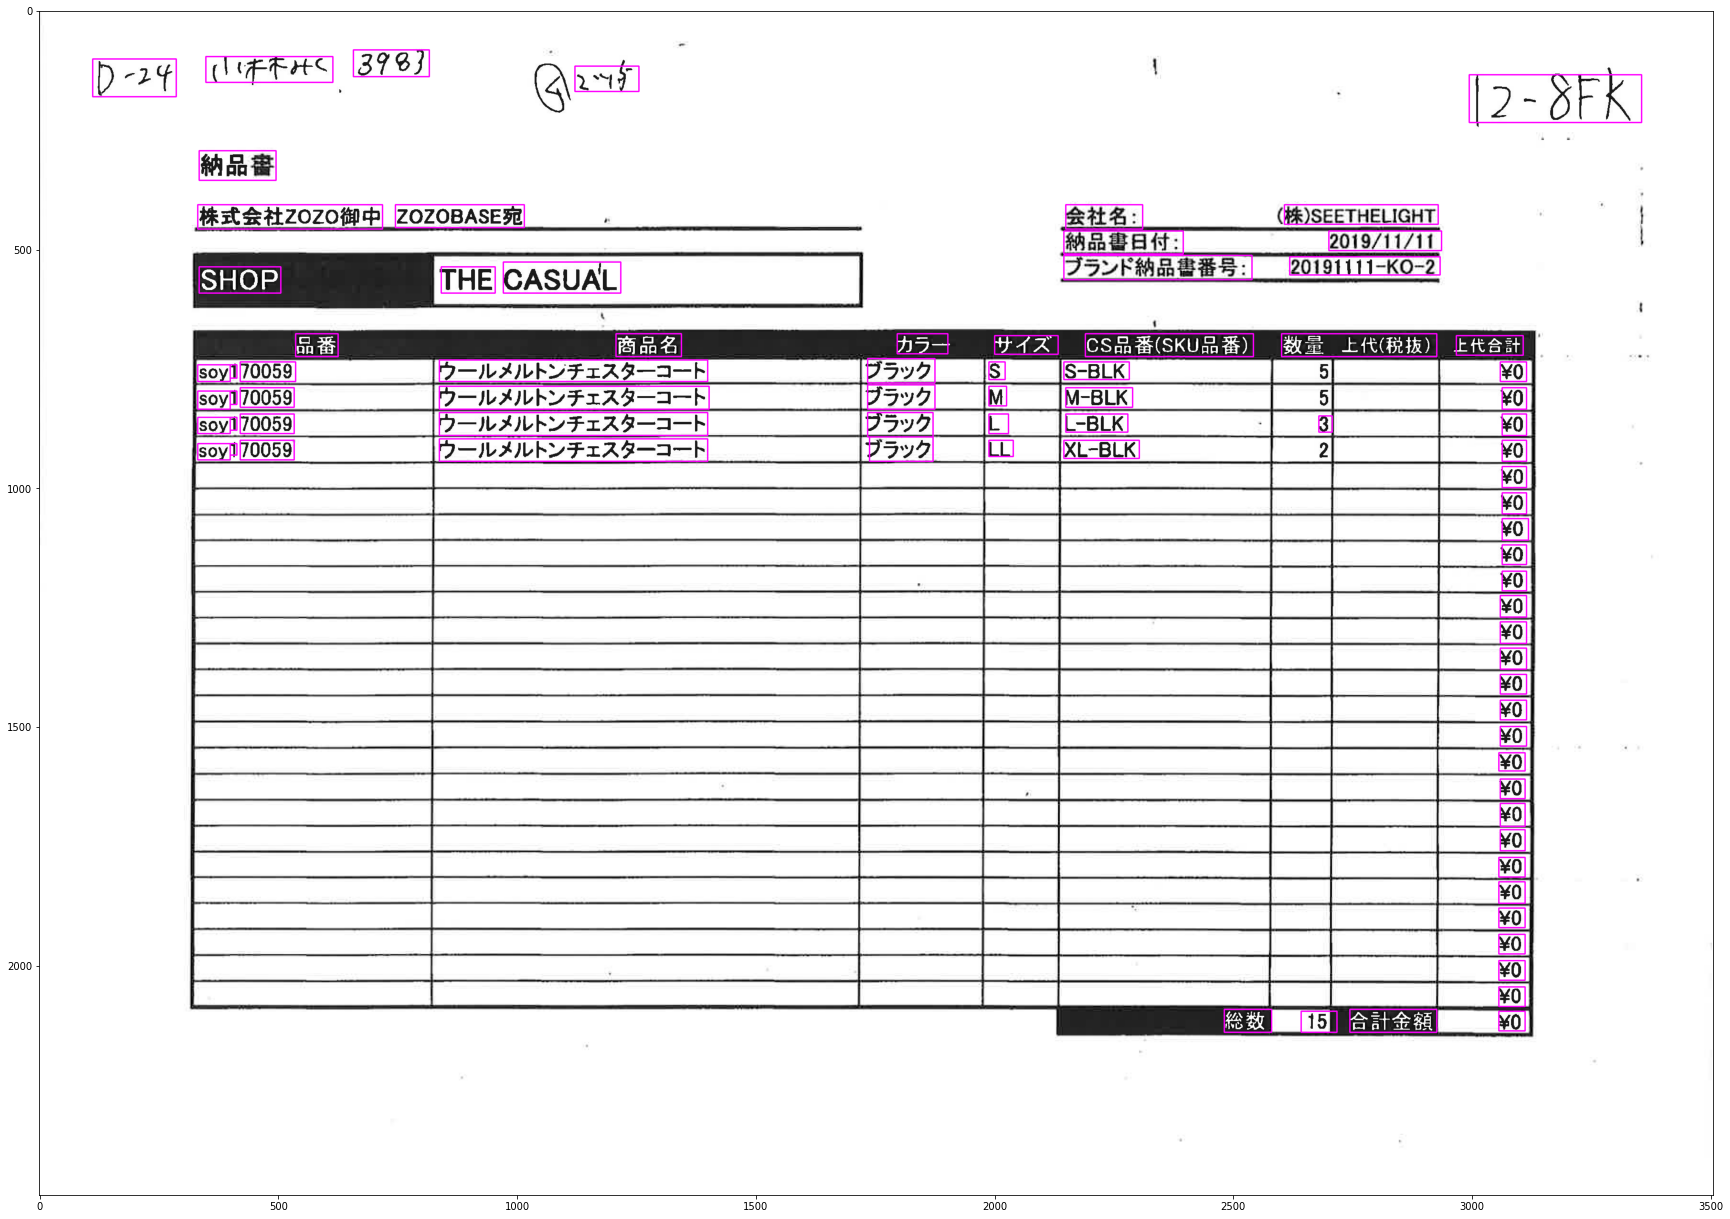

In [ ]:
# img_dir = "/content/my_data/"
# imput_img_dir = [glob.glob(f"{img_dir}*{e}") for e in ['.jpg', '.png']][0]
# print(imput_img_dir)
# glob.glob('/content/*.jpg')
images = [keras_ocr.tools.read(url) for url in imput_img_dir]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.

#images are numpy array
prediction_groups = pipeline.recognize(images)


def drow_rectangle_box(img_array, xmin_ymin, xmax_ymax):
    image = np.copy(img_array)
    for a, b in zip(xmin_ymin, xmax_ymax):
        image = cv2.rectangle(image,a,b,[255,0,255],2)
    return image


def convert_poins(prediction_groups):
    xmin_ymin = []
    xmax_ymax = []
    for multi_pt in prediction_groups:
        for single_pt in multi_pt:
            xmin_ymin.append(tuple(single_pt[1][0]))
            xmax_ymax.append(tuple(single_pt[1][2]))
    return xmin_ymin ,xmax_ymax




def write_csv(path, b):
    kk = pd.DataFrame({'img_name' : [path.split('/')[-1]] , "xmin":[b[0]], "ymin":[b[1]], "xmax":[b[2]], "ymax":[b[3]] })
    kk.to_csv("bbox.csv", mode="a+", header= False)

boundingbox=list()
for inx, img_path in enumerate(imput_img_dir):
    print(img_path.split('/')[-1])
    a, b= convert_poins([prediction_groups[inx]])
    for i, j in zip(a, b):
        bbox = [i[0], i[1], j[0], j[1]]
        boundingbox.append(bbox)
        # kk = pd.DataFrame({'img_name' : [img_path.split('/')[-1]] , "xmin":[bbox[0]], "ymin":[bbox[1]], "xmax":[bbox[2]], "ymax":[bbox[3]] })
        # kk.to_csv("bbox.csv", mode="a+", header= False, index_label=True)
        write_csv(img_path, bbox)


    img = cv2.imread(img_path)
    img = drow_rectangle_box(img ,a, b)

    plt.figure(figsize=(30, 30))
    plt.imshow(img)

In [ ]:
boundingbox

[[658.73065, 83.24861, 817.29565, 139.93544],
 [349.7633, 97.5458, 615.70294, 151.54105],
 [112.98633, 102.71484, 287.60156, 181.46289],
 [1122.5199, 117.30745, 1256.7339, 170.03441],
 [2995.405, 135.3547, 3356.014, 235.12811],
 [335.53516, 294.4492, 496.45508, 356.0781],
 [332.11136, 407.43555, 719.0039, 458.79297],
 [746.39453, 407.43555, 1016.87695, 455.36914],
 [2150.164, 407.43555, 2311.084, 458.79297],
 [2608.957, 407.43555, 2930.7969, 448.52148],
 [2146.7402, 462.2168, 2396.6797, 510.1504],
 [2701.4004, 462.2168, 2937.6445, 503.30273],
 [2146.7402, 513.5742, 2540.4805, 564.93164],
 [2619.2285, 516.99805, 2934.2207, 554.66016],
 [972.3672, 527.26953, 1218.8828, 592.32227],
 [335.53516, 537.541, 506.72656, 592.32227],
 [842.2617, 537.541, 955.24805, 592.32227],
 [537.541, 677.91797, 626.56055, 725.85156],
 [1208.6113, 677.91797, 1345.5645, 725.85156],
 [1797.5098, 677.91797, 1903.6484, 719.0039],
 [2001.6696, 681.68, 2134.5164, 720.08386],
 [2191.25, 677.91797, 2543.9043, 725.8515

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
model_path = '/home/vsrira10/Desktop/model.hdf5'
model = tf.keras.models.load_model(model_path)
tf.keras.experimental.export_savedmodel(model,newdir)

In [ ]:
print(tf.__version__)

NameError: ignored